In [224]:
import camelot
import pandas as pd

In [225]:
tables = camelot.read_pdf('ResidualSolvent.pdf')

### Extract the "Test name" and "Product Name"

In [226]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO


rsrcmgr = PDFResourceManager()
retstr = StringIO()
codec = 'utf-8'
laparams = LAParams()
device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
fp = open('ResidualSolvent.pdf', 'rb')
interpreter = PDFPageInterpreter(rsrcmgr, device)
password = ""
maxpages = 0
caching = True
pagenos=set()

for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
    interpreter.process_page(page)

text = retstr.getvalue()

fp.close()
device.close()
retstr.close()

print(text)

Sun Pharmaceutical Industries Ltd., Karkhadi

EMPOWER CALCULATION RESULT SUMMARY FOR RESIDUAL SOLVENT

Name of Product : Cefpodoxime Proxetil
Project Name: ABCD_MAY_18_FP
Sample Set Name:

 050518CefpodProResSolQCC_101S1

Instrument Method Id : 5134
Test : Residual Solvent
System_Name :  QCC-101

AR_Number 403RMJ0074

Sample
Name

Inj.
Vol.
(uL)
Cefpodoxime Proxetil 1_1 Kno-IPA 403RMJ0074 Tray 2:8 1 1000

Batch_No

Name

Vial

Inj

Name: Kno-IPA

Ch.
No.

RT
(min)

Std

Weight

Std_

DilnFactor

Std_

WC_LOD

8

14.249 243.400

0.00040

0.00000

Avg_Area Potency Sample
Std_
99.4000
9584.3722 99.960

Weight Dilution

Spl_wc
LOD_Solv

Sample
Area

(µV*sec)

Result Result

Id

0.5000

0.00000

3031
3031

154.8
154.8

7754

Sample
Name

Inj.
Vol.
(uL)
Cefpodoxime Proxetil 1_1 Kno-Methanol 403RMJ0074 Tray 2:8 1 1000

Batch_No

Name

Vial

Inj

Name: Kno-Methanol

Ch.
No.

RT
(min)

Std

Weight

Std_

DilnFactor

Std_

WC_LOD

8

8.478 509.600

0.00040

0.00000

Std_
Avg_Area Potency Sample


In [227]:
# read th elines form text extracted

line_i_am_interested_in = text.split('\n')

s = line_i_am_interested_in[4].split(':')
product_name = s[1].strip() # removed the white spaces
print(product_name)

p = line_i_am_interested_in[11].split(':')
test_name = p[1].strip()
print(test_name)

Cefpodoxime Proxetil
Residual Solvent


In [228]:
tables

<TableList n=2>

In [229]:
tables.export('foo.csv', f = 'csv', compress = True)

In [230]:
tables[0]

<Table shape=(3, 20)>

In [231]:
tables[0].df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,,Sample\nName,Name,Batch_No,Vial,Inj,Inj.\nVol.\n(uL),Ch.\nNo.,RT\n(min),Std\nWeight,Std_\nDilnFactor,Std_\nWC_LOD,Std_\nAvg_Area,Potency,Sample\nWeight,Dilution,Spl_wc\nLOD_Solv,Sample\nArea\n(µV*sec),Result,Result\nId
1,1,Cefpodoxime Proxetil 1_1,Kno-IPA,403RMJ0074,Tray 2:8,1,1000,8,14.249,243.400,0.00040,0.00000,9584.3722,99.960,99.4000,0.5000,0.00000,3031,154.8,7754
2,Mean,,,,,,,,,,,,,,,,,3031,154.8,Name: Kno-Methanol


In [232]:
data = tables[0].df
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,,Sample\nName,Name,Batch_No,Vial,Inj,Inj.\nVol.\n(uL),Ch.\nNo.,RT\n(min),Std\nWeight,Std_\nDilnFactor,Std_\nWC_LOD,Std_\nAvg_Area,Potency,Sample\nWeight,Dilution,Spl_wc\nLOD_Solv,Sample\nArea\n(µV*sec),Result,Result\nId
1,1,Cefpodoxime Proxetil 1_1,Kno-IPA,403RMJ0074,Tray 2:8,1,1000,8,14.249,243.400,0.00040,0.00000,9584.3722,99.960,99.4000,0.5000,0.00000,3031,154.8,7754
2,Mean,,,,,,,,,,,,,,,,,3031,154.8,Name: Kno-Methanol


In [233]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,,Sample\nName,Name,Batch_No,Vial,Inj,Inj.\nVol.\n(uL),Ch.\nNo.,RT\n(min),Std\nWeight,Std_\nDilnFactor,Std_\nWC_LOD,Std_\nAvg_Area,Potency,Sample\nWeight,Dilution,Spl_wc\nLOD_Solv,Sample\nArea\n(µV*sec),Result,Result\nId
1,1,Cefpodoxime Proxetil 1_1,Kno-IPA,403RMJ0074,Tray 2:8,1,1000,8,14.249,243.400,0.00040,0.00000,9584.3722,99.960,99.4000,0.5000,0.00000,3031,154.8,7754
2,Mean,,,,,,,,,,,,,,,,,3031,154.8,Name: Kno-Methanol


In [234]:
dframe = pd.DataFrame()
print(dframe)

Empty DataFrame
Columns: []
Index: []


In [235]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,,Sample\nName,Name,Batch_No,Vial,Inj,Inj.\nVol.\n(uL),Ch.\nNo.,RT\n(min),Std\nWeight,Std_\nDilnFactor,Std_\nWC_LOD,Std_\nAvg_Area,Potency,Sample\nWeight,Dilution,Spl_wc\nLOD_Solv,Sample\nArea\n(µV*sec),Result,Result\nId
1,1,Cefpodoxime Proxetil 1_1,Kno-IPA,403RMJ0074,Tray 2:8,1,1000,8,14.249,243.400,0.00040,0.00000,9584.3722,99.960,99.4000,0.5000,0.00000,3031,154.8,7754
2,Mean,,,,,,,,,,,,,,,,,3031,154.8,Name: Kno-Methanol


In [236]:
data.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [237]:
data.columns.values.size

20

### Clean the data

In [238]:
sample_data1 = data
sample_data2 = data
sample_data3 = data
sample_data4 = data

In [239]:
class Sample:
  def __init__(self,sample_name, name, assay_result):
    self.sample_name = sample_name
    self.name = name
    self.assay = assay_result
    
  def get_sample_name(self):
    return self.sample_name

  def get_name(self):
    return self.name

  def get_assay_result(self):
    return self.assay

In [240]:
def data_cleaning(data):
    col_names_arr = []
    index = 0
        
    while(index < data.columns.values.size):
        col_names_arr.append(data[index][0])
        index = index+1

    # add the first column name as s.no. for suture use
    col_names_arr[0] = 'first_col'
    
    # renaming the coumns
    data.columns = col_names_arr
    
    # dropping garbage at 0th index
    data.drop([0], inplace = True)
    
    return data

In [241]:

print(len(tables))
for i in range(len(tables)):
    
    data_list = []
    row_index = 1
    
    rows = (tables[i].df).shape[0]
    print(rows)
    
#     print(tables[i].df)
    # perform cleaining
    data = data_cleaning(tables[i].df)
    
    if(i == 0):
        sample_data1 = data
    
    if(i == 1):
        sample_data2 = data
    if(i == 2):
        sample_data3 = data
    if(i == 3):
        sample_data3 = data
    
    row_index = 1
    while(row_index < rows):
        
        sample_obj = Sample(data["Name"][row_index], data["Name"][row_index], data["Result"][row_index])
        data_list.append(sample_obj)
        row_index = row_index + 1;
        
            
        print(sample_obj.get_sample_name())
        print(sample_obj.get_assay_result())


2
3
Kno-IPA
154.8

154.8
3
Kno-Methanol
200.5

200.5


In [242]:
sample_data1

,first_col,Sample Name,Name,Batch_No,Vial,Inj,Inj. Vol. (uL),Ch. No.,RT (min),Std Weight,Std_ DilnFactor,Std_ WC_LOD,Std_ Avg_Area,Potency,Sample Weight,Dilution,Spl_wc LOD_Solv,Sample Area (µV*sec),Result,Result Id
1,1,Cefpodoxime Proxetil 1_1,Kno-IPA,403RMJ0074,Tray 2:8,1,1000,8,14.249,243.400,0.00040,0.00000,9584.3722,99.960,99.4000,0.5000,0.00000,3031,154.8,7754
2,Mean,,,,,,,,,,,,,,,,,3031,154.8,Name: Kno-Methanol


In [180]:
sample_data2

,first_col,Sample Name,Name,Batch_No,Vial,Inj,Inj. Vol. (uL),Ch. No.,RT (min),Std Weight,Std_ DilnFactor,Std_ WC_LOD,Std_ Avg_Area,Potency,Sample Weight,Dilution,Spl_wc LOD_Solv,Sample Area (µV*sec),Result,Result Id
1,1,Cefpodoxime Proxetil 1_1,Kno-Methanol,403RMJ0074,Tray 2:8,1,1000,8,8.478,509.600,0.00040,0.00000,22104.6389,99.800,99.4000,0.5000,0.00000,4330,200.5,7754
2,Mean,,,,,,,,,,,,,,,,,4330,200.5,


In [201]:
sample_data2

,first_col,Sample Name,Name,Batch_No,Vial,Inj,Inj. Vol. (uL),Ch. No.,RT (min),Std Weight,Std_ DilnFactor,Std_ WC_LOD,Std_ Avg_Area,Potency,Sample Weight,Dilution,Spl_wc LOD_Solv,Sample Area (µV*sec),Result,Result Id
1,1,Cefpodoxime Proxetil 1_1,Kno-IPA,403RMJ0074,Tray 2:8,1,1000,8,14.249,243.400,0.00040,0.00000,9584.3722,99.960,99.4000,0.5000,0.00000,3031,154.8,7754
2,Mean,,,,,,,,,,,,,,,,,3031,154.8,Name: Kno-Methanol


In [204]:
sample_data3

,first_col,Sample Name,Name,Batch_No,Vial,Inj,Inj. Vol. (uL),Ch. No.,RT (min),Std Weight,Std_ DilnFactor,Std_ WC_LOD,Std_ Avg_Area,Potency,Sample Weight,Dilution,Spl_wc LOD_Solv,Sample Area (µV*sec),Result,Result Id
1,1,Cefpodoxime Proxetil 1_1,Kno-IPA,403RMJ0074,Tray 2:8,1,1000,8,14.249,243.400,0.00040,0.00000,9584.3722,99.960,99.4000,0.5000,0.00000,3031,154.8,7754
2,Mean,,,,,,,,,,,,,,,,,3031,154.8,Name: Kno-Methanol


## Apply data analysis

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [266]:
data

,first_col,Sample Name,Name,Batch_No.,Vial,Inj,Inj. Vol. (uL),Ch. No.,Std Weight,Std_ DilnFactor,Std_ WC_LOD,Std_ Avg_Area,Potency,Sample Weight,Dilution,Spl_wc LOD_Solv,Avgwt _wtml,Sample Area (µV*sec),Assay,Result Id
1,1 2,Cefpodoxime Proxetil IP_1/1,sum,CDPNF18040,5 5,1 1,20.00,11,50.010,0.00050,0.00000,418014,744.300,51.1300,2000.0000,2.29000,1.00000,390029,695.178,18883
2,,Cefpodoxime Proxetil IP_1/2,sum,CDPNF18040,,,20.00,12,50.010,0.00050,0.00000,418014,744.300,51.1300,2000.0000,2.29000,1.00000,389827,694.819,18884
3,Mean,,,,,,,,,,,,,,,,,389928,695.0,


Text(0.5, 1.0, 'Plotting Assay and Result Id')

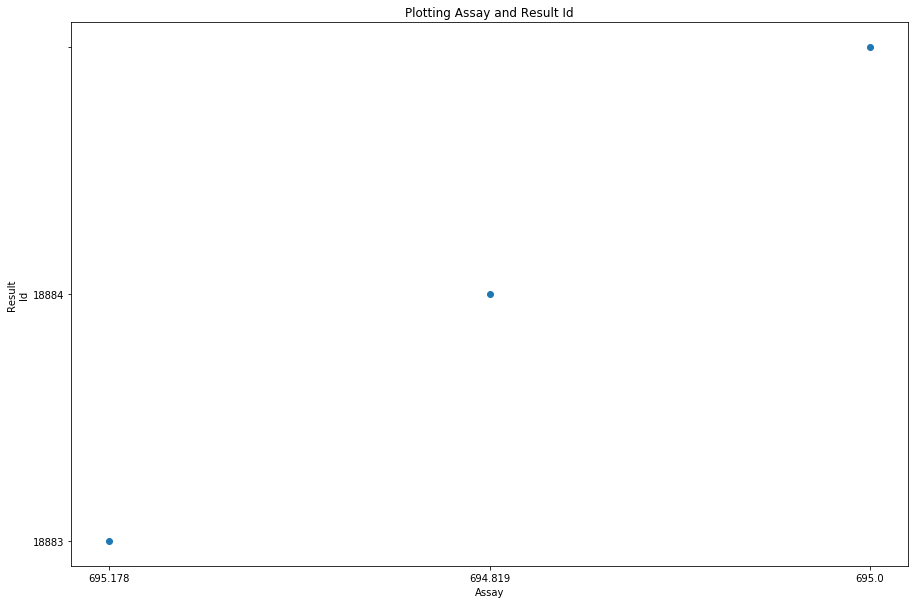

In [270]:
plt.figure(figsize=(15,10))
plt.scatter(y=data['Result\nId'], x=data['Assay'])
plt.xlabel('Assay')
plt.ylabel('Result\nId')
plt.title('Plotting Assay and Result Id')

In [202]:
# g = sns.jointplot("RRT", "RT", data=data,size=5, ratio=3, color="r")